In [73]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv('winequality-red.csv')
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1536,6.1,0.530,0.08,1.9,0.077,24.0,45.0,0.99528,3.60,0.68,10.3,6
1564,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
946,10.2,0.440,0.58,4.1,0.092,11.0,24.0,0.99745,3.29,0.99,12.0,7
1224,12.6,0.390,0.49,2.5,0.080,8.0,20.0,0.99920,3.07,0.82,10.3,6
500,7.8,0.520,0.25,1.9,0.081,14.0,38.0,0.99840,3.43,0.65,9.0,6


### Understanding The Data

In [76]:
df.shape

(1599, 12)

In [77]:
# It will tell us datatype and count of every column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [78]:
# It shows the null values in columns
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [79]:
# It will give fair idea about quartile range, mean and std.
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [80]:
# It gives no of copied rows in dataset.
df.duplicated().sum()

240

<AxesSubplot:>

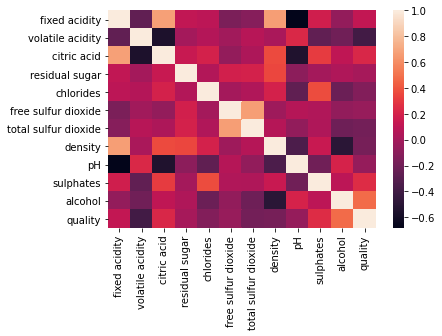

In [81]:
# This shows the correletion betn dependent and independent features 
sns.heatmap(df.corr())

# 

### EDA(Univariate and Bivariate)

In [83]:
df.sample(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1510,6.4,0.36,0.21,2.2,0.047,26.0,48.0,0.99661,3.47,0.77,9.7,6


C:\Users\91735\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

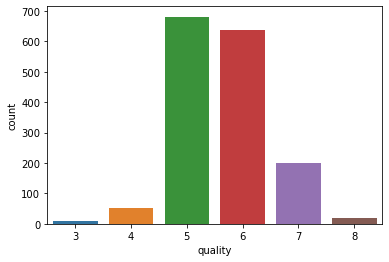

In [84]:
sns.countplot(df.quality)

<AxesSubplot:xlabel='pH', ylabel='Count'>

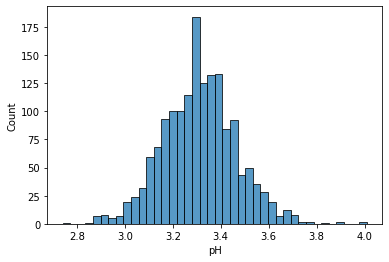

In [85]:
sns.histplot(df.pH)

C:\Users\91735\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality'>

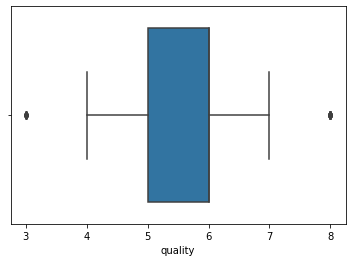

In [86]:
sns.boxplot(df.quality)

# 

### Feature Selection

<AxesSubplot:title={'center':'Correlation heatmap between variables'}>

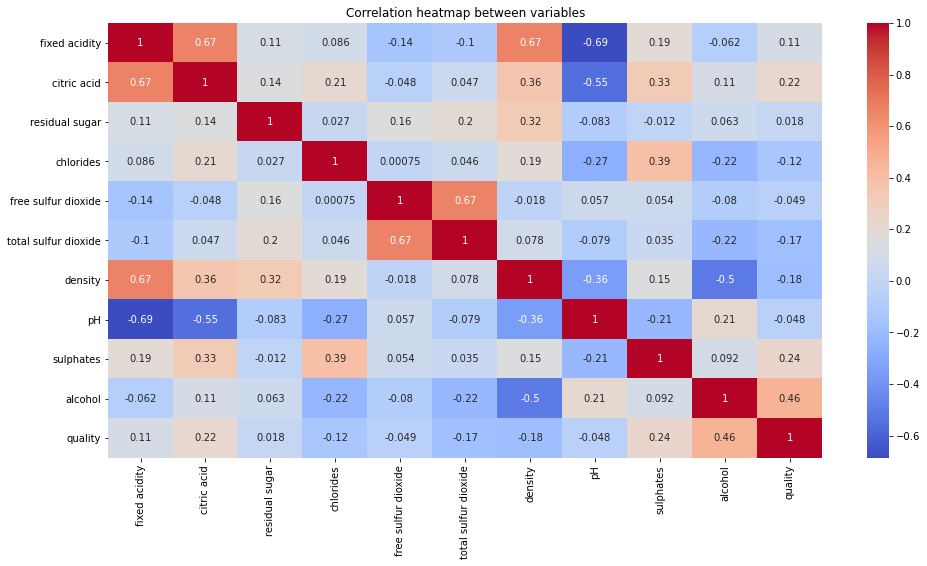

In [111]:
# checking the correlations with a heatmap

plt.figure(figsize = (16,8))
plt.title("Correlation heatmap between variables")
sns.heatmap(df.corr(), cmap = 'coolwarm', annot=True)

In [89]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [90]:
df.drop(columns=['volatile acidity'],inplace=True)

# 

### Feature Engneering

In [92]:
df.duplicated().sum()

240

In [93]:
df = df.drop_duplicates(keep='first')

In [94]:
df.shape

(1359, 11)

### Data Preprossesing

In [112]:
df['quality'].value_counts()

5    574
6    534
7    167
4     53
8     17
3     10
0      4
Name: quality, dtype: int64

In [113]:
df['quality'].replace(to_replace={0: 0, 3:0, 5:0,4:0, 6:1, 7:1, 8:1}, inplace=True)

In [114]:
df['quality'].value_counts()

1    718
0    641
Name: quality, dtype: int64

# 

### Train_test_split

In [116]:
# before doing anything further lets divide the data into training and testing sets.
from sklearn.model_selection import train_test_split

In [117]:
X = df.drop(columns=['quality'])
y = df.quality

In [118]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [119]:
print(X_train.shape)
X_train.head()

(1087, 10)


,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1016,8.9,0.40,2.2,0.068,12.0,28.0,0.99486,3.27,0.75,12.6
1519,6.6,0.08,2.6,0.106,14.0,27.0,0.99665,3.44,0.58,10.2
452,6.8,0.03,1.7,0.084,18.0,35.0,0.99680,3.44,0.63,10.0
847,7.4,0.16,1.8,0.078,12.0,39.0,0.99770,3.50,0.70,9.9
58,7.8,0.18,2.3,0.076,17.0,54.0,0.99750,3.43,0.59,10.0


# 

### Feature Scaling

In [141]:
from sklearn.preprocessing import StandardScaler

In [142]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 

### Random Forest Classifier

In [143]:
from sklearn.metrics import accuracy_score,r2_score

In [144]:
from sklearn.ensemble import RandomForestRegressor
# Rondom Forest Classifier
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred =rf.predict(X_test)
np.mean(cross_val_score(RandomForestClassifier(),X_train,y_train,cv=10,scoring='accuracy'))

0.7405113829425756

### GradientBoostingRegressor

In [145]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Classifier
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)
y_pred =gb.predict(X_test)
np.mean(cross_val_score(GradientBoostingClassifier(),X_train,y_train,cv=10,scoring='accuracy'))

0.7295191980971797

### Logistic Regression

In [146]:
from sklearn.linear_model import LogisticRegression
#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred =lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.7205882352941176

### SVC

In [147]:
from sklearn.svm import SVC
# Support Vector Machine
svc =SVC()
svc.fit(X_train,y_train)
y_pred =svc.predict(X_test)
np.mean(cross_val_score(SVC(),X_train,y_train,cv=10,scoring='accuracy'))

0.7332144070676181

### HyperParameter Tunning

In [148]:
from sklearn.model_selection import GridSearchCV
# No of tress in random forest
n_estimators = [10,15,20,40,60]

# number of feature to consider to every split
max_features = [0.2,0.6,1.0]

# Maximum no of levels in tree
max_depth = [2,4,6,8,10]

#Number of samples
max_samples = [0.5,0.75,1.0]
param_grid = {
    'n_estimators': n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'max_samples':max_samples
}
print(param_grid)

{'n_estimators': [10, 15, 20, 40, 60], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 4, 6, 8, 10], 'max_samples': [0.5, 0.75, 1.0]}


In [149]:
#Hyperparameter Tunning of # Rondom Forest Classifier
rf_grid = GridSearchCV(estimator=rf,
                      param_grid=param_grid,
                      cv=5,
                      verbose=2,
                      n_jobs=-1)
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [10, 15, 20, 40, 60]},
             verbose=2)

In [151]:
print(rf_grid.best_params_)
print(rf_grid.best_score_)

{'max_depth': 8, 'max_features': 0.2, 'max_samples': 1.0, 'n_estimators': 60}
0.3026631033945137


### Bagging Classifier

In [171]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
model =BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7720588235294118

In [181]:
# after cross validation sccore is 71%
x =cross_val_score(BaggingClassifier(),X_train,y_train,cv=10,scoring='accuracy',n_jobs=-1)
np.round(np.mean(x),2)

0.71

### HyperParameter Tunning on Bagging Classifier

In [175]:
from sklearn.ensemble import BaggingClassifier
parameters = {
    'n_estimators': [25,50,75,100], 
    'max_samples': [0.1,0.5,0.75,1.0]
    }
search = GridSearchCV(BaggingClassifier(), parameters, cv=5,n_jobs=-1,scoring='accuracy')
search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'max_samples': [0.1, 0.5, 0.75, 1.0],
                         'n_estimators': [25, 50, 75, 100]},
             scoring='accuracy')

In [176]:
print(search.best_params_)
print(search.best_score_)

{'max_samples': 0.5, 'n_estimators': 100}
0.7497780408404853


### AdaBoost Classifier

In [154]:
from sklearn.ensemble import AdaBoostClassifier
grid = dict()
grid['n_estimators'] = [10,20,40,80,50,100,400,500]
grid['learning_rate'] = [0.0001,0.001,0.01,0.1,0.25,0.5,1.0]
grid['algorithm'] = ['SAMME','SAMME.R']


grid_search = GridSearchCV(estimator=AdaBoostClassifier(),param_grid=grid,n_jobs=-1,cv=10,scoring='accuracy')
grid_result = grid_search.fit(X,y)


In [155]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.729956 using {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 100}


### Stacking Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [156]:
estimators = [
('rf',RandomForestClassifier(n_estimators=10,random_state=42)),
('knn',KNeighborsClassifier(n_neighbors=10)),
('gbdt',GradientBoostingClassifier())]
from sklearn.ensemble import StackingClassifier
scl = StackingClassifier(estimators=estimators,
                        final_estimator=LogisticRegression(),
                        cv=10,n_jobs=-1)


In [157]:
scl.fit(X_train,y_train)

StackingClassifier(cv=10,
                   estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('knn', KNeighborsClassifier(n_neighbors=10)),
                               ('gbdt', GradientBoostingClassifier())],
                   final_estimator=LogisticRegression(), n_jobs=-1)

In [158]:
y_pred = scl.predict(X_test)
accuracy_score(y_test,y_pred)

0.7610294117647058

# Conclusion

###### After applying all the algorithms, at the end we get an accuracy of 76% with stacking .